In [314]:
# Import Packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)

In [315]:
# Import prospective dataset
df= pd.read_excel('H:/RediMinds/DRMahen/Preethi PN_Data validation_2014-2018.xlsx', sheet_name='PN_Data validation_2014-2018')

In [316]:
df_ori = df.copy()

In [317]:
#check number of patients and columns in Retrospective dataset
print('Number of patients in Combined dataset {}'. format(df.shape[0]))
print('Number of variables in Combined dataset {}'. format(df.shape[1]))

Number of patients in Combined dataset 3395
Number of variables in Combined dataset 161


In [318]:
# reset index for combined dataset
df.reset_index(inplace=True, drop=True)

In [320]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 161 columns):
PATIENTNUMBER                         3395 non-null object
PROCNAME                              3395 non-null object
CENTERCODE                            3395 non-null object
SURGEONCODE                           949 non-null object
RECPROGRESS                           3395 non-null object
CREATEDDATE                           3395 non-null object
GENDER                                3384 non-null object
DATEOFBIRTH                           2028 non-null float64
AGEATSURGERY                          3376 non-null float64
MARITALSTATUS                         2160 non-null object
RACE                                  2099 non-null object
EDUCATION                             1927 non-null object
WEIGHT                                2363 non-null float64
HEIGHT                                2361 non-null float64
BMI                                   3009 non-null float64
CLI

In [321]:
#clean Clavien grade
df['CLAVIENGRADE'] = df['CLAVIENGRADE'].map(lambda x: str(x).split(':')[0])

In [322]:
df['CLAVIENGRADE'].value_counts()

Grade 0    2113
nan         984
Grade 1     145
Grade 2      85
Grade 3      54
Grade 4      12
Grade 5       2
Name: CLAVIENGRADE, dtype: int64

In [325]:
# Prepare target variable for morbidity
df['POSTOP_COMPLICATIONS'] = 0
df.loc[((df['POSTOPCOMPLICATION']== 'Complications') &
           ((df['SURGICALCOMPLICATIONS'].notnull()) | (df['NONSURGICALCOMPLICATIONS'].notnull()))) |
           (df['LENGTHOFSTAYdays']>=4) |
           ((df['CLAVIENGRADE']!= 'Grade 0') & (df['CLAVIENGRADE']!='nan')),['POSTOP_COMPLICATIONS']] = 1

In [326]:
# Total Number patients with complications
print('Total number of patients {}'.format(len(df)))
print('Total number of patients with complications {}'.format(df['POSTOP_COMPLICATIONS'].sum()))
print('Total % of patients with complications {:.3f}'.format(df['POSTOP_COMPLICATIONS'].sum()/len(df)))

Total number of patients 3395
Total number of patients with complications 1234
Total % of patients with complications 0.363


In [327]:
len(df.loc[((df['POSTOPCOMPLICATION']== 'Complications') &
           ((df['SURGICALCOMPLICATIONS'].notnull()) | (df['NONSURGICALCOMPLICATIONS'].notnull()))) |
           (df['LENGTHOFSTAYdays']>=4) |
           ((df['CLAVIENGRADE']!= 'Grade 0') & (df['CLAVIENGRADE']!='nan') & (df['CLAVIENGRADE']!= 'Grade 1') & (df['CLAVIENGRADE']!= 'Grade 2'))])

1156

In [328]:
1156/3395

0.34050073637702505

In [260]:
# Total Number patients with complications
print('Total number of patients {}'.format(len(df)))
print('Total number of patients with complications {}'.format(df['POSTOP_COMPLICATIONS'].sum()))
print('Total % of patients with complications {:.3f}'.format(df['POSTOP_COMPLICATIONS'].sum()/len(df)))

Total number of patients 3395
Total number of patients with complications 1234
Total % of patients with complications 0.363


### Define numeric columns and identify missing values

In [261]:
# List of columns tobre converted to numeric
numeric_col_list = ['AGEATSURGERY',
'WEIGHT',
'HEIGHT',
'BMI',
'CLINICALSIZEmm',
'PREOPHB',
'PREOPHT',
'PREOPWBC',
'PREOPCREAT',
'PREOPGFR',
'PREOPEGFR',
'PREOPERPF',
'NOOFLESIONS',
'BLOODLOSSml',
'POSTOPHB_Day1',
'POSTOPHT_Day1',
'POSTOPCreat_Day1',
'POSTOPEGFR_Day1',
'POSTOPWBC_Day1',
'POSTOPHB_Day2',
'POSTOPHT_Day2',
'POSTOPCreat_Day2',
'POSTOPEGFR_Day2',
'POSTOPWBC_Day2',
'POSTOPHB_Day3',
'POSTOPHT_Day3',
'POSTOPCreat_Day3',
'POSTOPEGFR_Day3',
'POSTOPWBC_Day3',
'LENGTHOFSTAYdays',
'PATHOLOGICALTUMORSIZE',
'MINTHICKNESSMARGIN',
'MAXTHICKNESSMARGIN',
'SARCOMATOIDDIFF_A',
'NO_OF_NODE_TAKEN',
'LASTFOLLOWUPDURATION',
'CHARLSONSCORE',
'CHARLSONAGEADJUSTSCORE',
'PADUASCORE',
'ISCHEMIATIMEmin',
'OPERATIVETIMEmin'
] 

### Define Categorical columns

In [262]:
cat_col = ['PROCNAME',
'CENTERCODE',
'SURGEONCODE',
'RECPROGRESS',
'GENDER',
'MARITALSTATUS',
'RACE',
'EDUCATION',
'ECOG',
'SYMPTOMS',
'SOLITARYKIDNEY',
'TYPEOFSOLITARYKIDNEY',
'BILATERALITYOFTUMOR',
'SIDEOFTUMOR',
'SIDEOFSURGERY',
'PREOPMULTIFOCALITY',
'FACE',
'TUMORlOCATION',

'PADUARISK',
'POLARLOCATION',
'RIMLOCATION',
'RENALSINUS',
'UCSINVASION',
'EXOPHYTICRATE',
'CLINICALSIZEGROUP',
'CT',
'CN',
'CM',
'R.E.N.A.L.NEPHROSCORE',
'R.E.N.A.L.NEPHRORISKSTRATIFICATION',
'RADIUSmaximaldiameterincm',
'EXOPHYTICENDOPHYTICPROPERTIES',
'NEARNESSOFTUMOUR',
'ANTERIORORPOSTERIOR',
'LOCATIONTOPOLARLINE',
'TumorConsistencyonImaging',
'BosniakClassification',
'ASASCORE',
'PARTIALNEPHROINDICATION',
'MULTIFOCALITY',
'ImagingFeaturesofotherexcisedtumor',
'Consistencyoftheotherexcisedtumors',
'ACCESS',
'DAVINCIMODEL',
'ROBOTICSARMS',
'ASSISTENTTROCARS',
'DUALCONSOLE',
'PRIMARYSURGEON',
'ISCHEMIA',
'CLAMPARTERY',
'SELECTIVEARTERIALCLAMPING',
'CLAMPVEIN',
'EARLYUNCLAMPING',
'FLUORESCENCE',
'INNERRENORRHAPHY',
'OUTERRENORRHAPHY',
'UCSREPAIR',
'HAEMOSTATICAGENTS',
'HAEMOSTATICDetails',
'LYMPHNODEDISSECTIONLND',
'INTRAOPTRANSUFUSION',
'SURGICALCONSIDERATIONS',
'INTRAOPCOMPLICATION',
'INTRAOPCOMPLICATIONS',
'NeedtoConverttoRadicalNephrectomy',
'TREATMENTOFCOMPLICATION',
'POSTOPCOMPLICATION',
'SURGICALCOMPLICATIONS',
'NONSURGICALCOMPLICATIONS',
'POSTOPTREATMENTOFCOMPLICATION',
'CLAVIENGRADE',
'MULITIFOCALITY',
'PATHOLOGY',
'HYSTOTYPEMALIGNANAT',
'HYSTOTYPEMALIGNANATYES',
'HYSTOTYPEBENIGN',
'HYSTOTYPEBENIGNYES',
'FUHRMANGRADING',
'SARCOMATOIDDIFF',
'NECROSIS',
'MICROVENOUSINVASION',
'UCSINVASION_A',
'PERIRENALFATINVASION',
'HilarFatInvasion',
'SINUSFATINVASION',
'MICSCORE',
'ADRENALINVASION',
'GEROTAINVASION',
'RenalVeinInvasion',
'VENOUSTHROMBUS',
'SURGICALMARGIN',
'UNIFOCALMULTIFOCAL',
'NO_OF_NODE_POSITIVE',
'SITEOFPOSITIVENODE',
'TREATMENTPSM',
'PT',
'PN',
'OTHERTUMORS',
'LASTFOLLOWUPSTATUS',
'LASTFOLLOWUPRECURRENCE',
'LASTTREATMENTOFRECURRENCE'
]

### Select Variables for analysis

In [263]:
post_op_col = [
'PATIENTNUMBER',
#'PROCNAME',
'CENTERCODE',
#'SURGEONCODE',
#'RECPROGRESS',
#'CREATEDDATE',
'GENDER',
#'DATEOFBIRTH',
'AGEATSURGERY',
'MARITALSTATUS',
'RACE',
'EDUCATION',
#'WEIGHT',
#'HEIGHT',
'BMI',
'CLINICALSIZEmm',
'ECOG',
'CHARLSONSCORE',
#'CHARLSONAGEADJUSTSCORE',
'SYMPTOMS',
'SOLITARYKIDNEY',
'TYPEOFSOLITARYKIDNEY',
'BILATERALITYOFTUMOR',
'SIDEOFTUMOR',
'SIDEOFSURGERY',
'PREOPMULTIFOCALITY',
'FACE',
'TUMORlOCATION',
'PREOPHB',
'PREOPHT',
'PREOPWBC',
'PREOPCREAT',
'PREOPGFR',
'PREOPEGFR',
'PREOPERPF',
#'PADUASCORE',
'PADUARISK',
'POLARLOCATION',
'RIMLOCATION',
'RENALSINUS',
#'UCSINVASION',
'EXOPHYTICRATE',
'CLINICALSIZEGROUP',
'CT',
'CN',
'CM',
#'R.E.N.A.L.NEPHROSCORE',
'R.E.N.A.L.NEPHRORISKSTRATIFICATION',
'RADIUSmaximaldiameterincm',
'EXOPHYTICENDOPHYTICPROPERTIES',
'NEARNESSOFTUMOUR',
'ANTERIORORPOSTERIOR',
'LOCATIONTOPOLARLINE',
'TumorConsistencyonImaging',
'BosniakClassification',
#'DATEOFSURGERY',
'ASASCORE',
'PARTIALNEPHROINDICATION',
'MULTIFOCALITY',
'NOOFLESIONS',
#'ImagingFeaturesofotherexcisedtumor', #too many categories
'Consistencyoftheotherexcisedtumors',
'ACCESS',
'DAVINCIMODEL',
'ROBOTICSARMS',
'ASSISTENTTROCARS',
'DUALCONSOLE',
#'PRIMARYSURGEON',
'OPERATIVETIMEmin',
'ISCHEMIA',
'CLAMPARTERY',
'SELECTIVEARTERIALCLAMPING',
'CLAMPVEIN',
'EARLYUNCLAMPING',
'FLUORESCENCE',
'INNERRENORRHAPHY',
'OUTERRENORRHAPHY',
'ISCHEMIATIMEmin',
'UCSREPAIR',
'HAEMOSTATICAGENTS',
#'HAEMOSTATICDetails', # too many values
'LYMPHNODEDISSECTIONLND',
'BLOODLOSSml',
'INTRAOPTRANSUFUSION',
#'SURGICALCONSIDERATIONS', too many values
'INTRAOPCOMPLICATION',
'INTRAOPCOMPLICATIONS',
'NeedtoConverttoRadicalNephrectomy',
'POSTOP_COMPLICATIONS'    
]

### Data Cleaning

In [264]:
# function to clean operative time which contains a mix of time and numeric data i.e. '2:30' & '120.6'
def clean_oprerative_time(t):
    if ':' in t:
        x = float(t.split(':')[0])*60 + float(t.split(':')[1])
    else:
        x = float(t)
    return x

# clean operative time 
df['OPERATIVETIMEmin'] = df['OPERATIVETIMEmin'].map(lambda x: clean_oprerative_time(str(x)))

In [265]:
# Clean INTRAOPCOMPLICATIONS consider first code as primary complication
df['INTRAOPCOMPLICATIONS'] = df['INTRAOPCOMPLICATIONS'].map(lambda x: str(x).split(',')[0])

In [266]:
# Define Intra-op Complications
df['INTRA_OP_COMPLICATIONS'] = 0

# selecting indicator == 'Yes' and code vailability or Intra-op Bloos transfusion>1 unit as Intra-op complication
df.loc[((df['INTRAOPCOMPLICATIONS'].notnull()) & (df['INTRAOPCOMPLICATION'] == 'Yes'))|(df['INTRAOPTRANSUFUSION']=='>1 Unit') ,['INTRA_OP_COMPLICATIONS']] = 1

In [267]:
#Drop INTRAOPCOMPLICATION as it has been replaced by INTRA_OP_COMPLICATIONS
df.drop(labels=['INTRAOPCOMPLICATION'],axis = 'columns' ,inplace=True)
post_op_col.remove('INTRAOPCOMPLICATION') # remove the varibale from list of predictors for post-op complications

In [268]:
# Convert columns in numeric_col_list to numeric and invalid values are set NaN 
for col in numeric_col_list:
    df[col]= pd.to_numeric(df[col], errors='coerce')

In [269]:
# Summary of numeric columns
df.describe(include = [np.number]).round(2)

,DATEOFBIRTH,AGEATSURGERY,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,LOCATIONTOPOLARLINE,NOOFLESIONS,OPERATIVETIMEmin,ISCHEMIATIMEmin,BLOODLOSSml,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,FUHRMANGRADING,SARCOMATOIDDIFF_A,MICSCORE,NO_OF_NODE_TAKEN,LASTFOLLOWUPDURATION,Year,POSTOP_COMPLICATIONS,INTRA_OP_COMPLICATIONS
count,2028.00,3376.00,2363.00,2361.00,3009.00,3198.00,2816.00,2775.00,2551.00,2425.00,2121.00,3330.00,152.00,2657.00,177.00,2152.00,2014.00,2788.00,3082.00,3129.00,3271.00,1298.00,1448.00,2358.00,1829.00,944.00,571.00,612.00,795.00,582.00,492.00,440.00,450.00,654.00,411.00,430.00,3186.00,2941.00,1531.00,650.00,2765.00,1407.00,2446.00,2034.00,1909.00,3392.00,3395.00,3395.00
mean,1956.34,57.70,89.99,163.90,28.68,34.48,1.52,3.52,20.35,46.59,7210.94,4.41,586.08,80.36,730.84,8.40,1.89,1.06,181.26,19.84,184.87,49.74,59.47,19.52,97.95,1983.51,166.26,164.61,109.36,214.76,2805.69,232.06,271.79,146.10,293.22,2756.73,3.82,10.87,73.10,193.77,133.74,15.02,0.28,1.09,16.89,2013.33,0.36,0.06
std,13.26,12.72,55.94,39.74,5.92,37.87,2.00,2.28,80.19,102.09,3348.54,57.36,466.89,30.38,396.76,1.74,0.82,0.29,70.78,36.62,223.21,179.15,166.94,133.60,170.18,4248.06,351.86,340.25,310.10,345.24,4982.11,411.12,422.01,351.87,401.95,4138.05,25.07,23.69,252.83,385.78,337.49,142.76,0.45,31.32,19.59,2.98,0.48,0.23
min,1921.00,16.00,7.71,1.70,15.10,0.00,0.00,0.00,3.80,0.24,0.00,0.00,18.00,0.02,43.50,2.00,1.00,0.00,21.00,0.00,0.00,1.00,0.27,0.00,4.00,3.60,0.00,0.00,0.00,0.00,2.10,0.00,0.00,0.00,0.00,2.60,0.00,0.00,0.00,0.00,1.00,-999.00,0.00,0.00,0.00,2006.00,0.00,0.00
25%,1947.00,49.00,69.00,160.00,24.59,22.00,0.00,2.00,12.90,36.00,5600.00,0.78,66.50,65.29,210.00,7.00,1.00,1.00,140.00,14.00,50.00,11.00,30.40,0.96,52.64,9.18,10.90,27.30,0.91,49.75,9.50,10.70,29.02,0.90,55.78,9.12,2.00,2.40,1.00,2.00,2.00,0.00,0.00,0.00,3.00,2011.00,0.00,0.00
50%,1956.00,59.00,79.83,169.00,27.59,30.00,1.00,3.00,13.90,40.80,7000.00,0.91,999.00,79.32,999.00,8.00,2.00,1.00,172.00,18.00,100.00,12.10,35.00,1.00,65.00,11.60,12.20,34.20,1.17,67.78,12.00,12.20,35.20,1.12,74.65,999.00,3.00,3.60,2.00,5.00,2.00,0.00,0.00,0.00,10.00,2013.00,0.00,0.00
75%,1965.00,67.00,93.25,176.00,31.71,42.00,2.00,5.00,14.90,44.00,8500.00,1.10,999.00,94.00,999.00,10.00,3.00,1.00,210.00,23.00,200.00,13.30,38.30,1.30,81.00,18.85,14.50,40.60,1.58,94.99,4990.00,14.22,832.25,1.54,141.00,4300.00,4.00,8.20,5.00,25.00,3.00,0.00,1.00,0.00,24.00,2016.00,1.00,0.00
max,1998.00,89.00,999.00,999.00,55.60,999.00,19.00,18.00,999.00,999.00,56000.00,999.00,999.00,999.00,999.00,14.00,3.00,6.00,999.00,999.00,3500.00,999.00,999.00,999.00,999.00,19610.00,999.00,999.00,999.00,999.00,27780.00,999.00,999.00,999.00,999.00,16060.00,999.00,999.00,999.00,999.00,999.00,999.00,1.00,999.00,101.00,2018.00,1.00,1.00


In [270]:
#replace missing values such as 999 in the dataframe with NaN
df = df.replace([99,999,9999,99999,999999,-99,-999,-9999,-99999,-999999],np.nan)

In [271]:
# replacing negative numbers in the dataframe with nan as given variables cannot contain negative numbers
for col in list(df.select_dtypes('float64')):
    df[col] = df[col].apply(lambda x: np.nan if x<0 else x)

In [272]:
# Summary of numeric columns - to check missing values such as 99, 999, 999 have been replaced
df.describe(include = [np.number]).round(2)

,DATEOFBIRTH,AGEATSURGERY,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,LOCATIONTOPOLARLINE,NOOFLESIONS,OPERATIVETIMEmin,ISCHEMIATIMEmin,BLOODLOSSml,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,FUHRMANGRADING,SARCOMATOIDDIFF_A,MICSCORE,NO_OF_NODE_TAKEN,LASTFOLLOWUPDURATION,Year,POSTOP_COMPLICATIONS,INTRA_OP_COMPLICATIONS
count,2028.00,3376.00,2353.00,2358.00,3009.00,3194.00,2816.00,2775.00,2534.00,2398.00,2098.00,3319.00,67.00,2641.00,56.00,2152.00,2014.00,2788.00,3073.00,3125.00,3268.00,1254.00,1404.00,2315.00,1762.00,897.00,485.00,525.00,709.00,484.00,466.00,342.00,337.00,559.00,308.00,333.00,3184.00,2940.00,1423.00,528.00,2400.00,1375.00,2446.00,2032.00,1909.00,3392.00,3395.00,3395.00
mean,1956.34,57.70,88.04,162.84,28.68,33.27,1.52,3.52,13.79,35.87,7279.04,1.11,62.23,79.91,151.44,8.40,1.89,1.06,179.74,18.59,184.12,16.44,30.03,1.33,66.24,2035.09,18.60,26.34,1.45,63.41,2906.49,12.30,27.95,1.15,65.96,3268.74,3.19,10.54,4.10,11.12,2.15,0.12,0.28,0.11,16.89,2013.33,0.36,0.06
std,13.26,12.72,37.17,26.32,5.92,16.40,2.00,2.28,1.75,14.40,3302.70,3.27,23.65,24.63,61.02,1.74,0.82,0.29,60.90,10.66,221.94,21.64,13.90,4.59,21.75,4351.91,27.08,15.71,6.51,24.83,5100.64,10.87,22.37,0.56,36.50,4578.29,2.47,15.14,10.41,46.63,0.67,2.28,0.45,0.64,19.59,2.98,0.48,0.23
min,1921.00,16.00,7.71,1.70,15.10,0.00,0.00,0.00,3.80,0.24,0.00,0.00,18.00,0.02,43.50,2.00,1.00,0.00,21.00,0.00,0.00,1.00,0.27,0.00,4.00,3.60,0.00,0.00,0.00,0.00,2.10,0.00,0.00,0.00,0.00,2.60,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2006.00,0.00,0.00
25%,1947.00,49.00,69.00,160.00,24.59,22.00,0.00,2.00,12.80,36.00,5600.00,0.78,42.00,65.01,110.00,7.00,1.00,1.00,140.00,14.00,50.00,11.00,30.17,0.95,52.00,9.10,10.70,1.46,0.90,47.22,9.30,10.40,25.70,0.86,49.92,8.50,2.00,2.40,1.00,1.80,2.00,0.00,0.00,0.00,3.00,2011.00,0.00,0.00
50%,1956.00,59.00,79.60,169.00,27.59,30.00,1.00,3.00,13.90,40.70,7000.00,0.91,58.00,79.05,132.00,8.00,2.00,1.00,172.00,18.00,100.00,12.00,34.95,1.00,64.00,11.30,11.90,32.70,1.10,62.80,11.60,11.70,32.80,1.07,65.00,11.80,3.00,3.60,2.00,3.00,2.00,0.00,0.00,0.00,10.00,2013.00,0.00,0.00
75%,1965.00,67.00,93.00,176.00,31.71,42.00,2.00,5.00,14.90,44.00,8500.00,1.10,83.00,93.59,182.50,10.00,3.00,1.00,210.00,23.00,200.00,13.18,38.00,1.29,79.00,15.80,13.10,36.90,1.40,79.00,5635.00,12.70,37.00,1.27,79.25,6940.00,4.00,8.20,4.00,8.00,3.00,0.00,1.00,0.00,24.00,2016.00,1.00,0.00
max,1998.00,89.00,377.00,208.30,55.60,135.00,19.00,18.00,39.60,88.00,56000.00,96.00,124.00,253.97,340.00,14.00,3.00,6.00,608.00,320.00,3500.00,162.00,96.80,143.00,198.30,19610.00,152.00,51.00,174.00,157.70,27780.00,131.00,332.00,5.80,543.00,16060.00,51.00,115.00,240.00,979.00,4.00,70.00,1.00,12.00,101.00,2018.00,1.00,1.00


In [273]:
# Correcting the units for erroroneously entered data
def clean_WBC(x):
    if len(str(x))<6:
        x = x*1000
    return x
        

# if the value of PRE-OP WBC value contains is less the 4 digits then multiply it by 1000
df['PREOPWBC'] = df['PREOPWBC'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 1 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day1'] = df['POSTOPWBC_Day1'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day2'] = df['POSTOPWBC_Day2'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day3'] = df['POSTOPWBC_Day3'].apply(lambda x: clean_WBC(x))

In [274]:
# Correcting the units for erroroneously entered data for PREOPHB
df['PREOPHB'] = df['PREOPHB'].apply(lambda x: x*100 if x<10 else x)

# Correcting the units for erroroneously entered data for PREOPHB
df['PREOPHT'] = df['PREOPHT'].apply(lambda x: x*100 if x<10 else x)

In [275]:
# Selecting dataframe relevant columsn for analysis
df = df[post_op_col].copy()

In [276]:
#Keep columns having less than 50% missing data
print("Total number of columns before removing columns with more than 50% missing data: {}".format(len(list(df))))

df = df[df.columns[df.isnull().mean() <= 0.50]].copy()

print("Total number of columns left after removing columns with more than 50% missing data: {}".format(len(list(df))))

Total number of columns before removing columns with more than 50% missing data: 72
Total number of columns left after removing columns with more than 50% missing data: 64


In [277]:
# select target variable
target = 'POSTOP_COMPLICATIONS'

In [278]:
df.describe()

,AGEATSURGERY,BMI,CLINICALSIZEmm,CHARLSONSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPEGFR,LOCATIONTOPOLARLINE,NOOFLESIONS,OPERATIVETIMEmin,ISCHEMIATIMEmin,BLOODLOSSml,POSTOP_COMPLICATIONS
count,3376.000000,3009.000000,3194.000000,2816.000000,2534.000000,2398.000000,2098.000000,3319.000000,2641.000000,2014.000000,2788.000000,3073.000000,3125.000000,3268.000000,3395.000000
mean,57.704976,28.681941,33.272041,1.515625,30.025083,41.279775,7584.309314,1.108866,79.910629,1.892751,1.055954,179.744224,18.591014,184.119645,0.363476
std,12.723756,5.916510,16.395130,1.995493,118.669940,6.107906,4960.175584,3.265859,24.631750,0.817358,0.293006,60.903962,10.663582,221.940411,0.481071
min,16.000000,15.100000,0.000000,0.000000,10.000000,10.400000,0.000000,0.000000,0.020000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000
25%,49.000000,24.590000,22.000000,0.000000,12.900000,38.300000,5770.000000,0.780000,65.010000,1.000000,1.000000,140.000000,14.000000,50.000000,0.000000
50%,59.000000,27.590000,30.000000,1.000000,14.000000,41.600000,7100.000000,0.910000,79.050000,2.000000,1.000000,172.000000,18.000000,100.000000,0.000000
75%,67.000000,31.710000,42.000000,2.000000,15.000000,44.475000,8600.000000,1.100000,93.590000,3.000000,1.000000,210.000000,23.000000,200.000000,1.000000
max,89.000000,55.600000,135.000000,19.000000,990.000000,180.000000,186000.000000,96.000000,253.971416,3.000000,6.000000,608.000000,320.000000,3500.000000,1.000000


In [279]:
numeric_stats = df.describe()

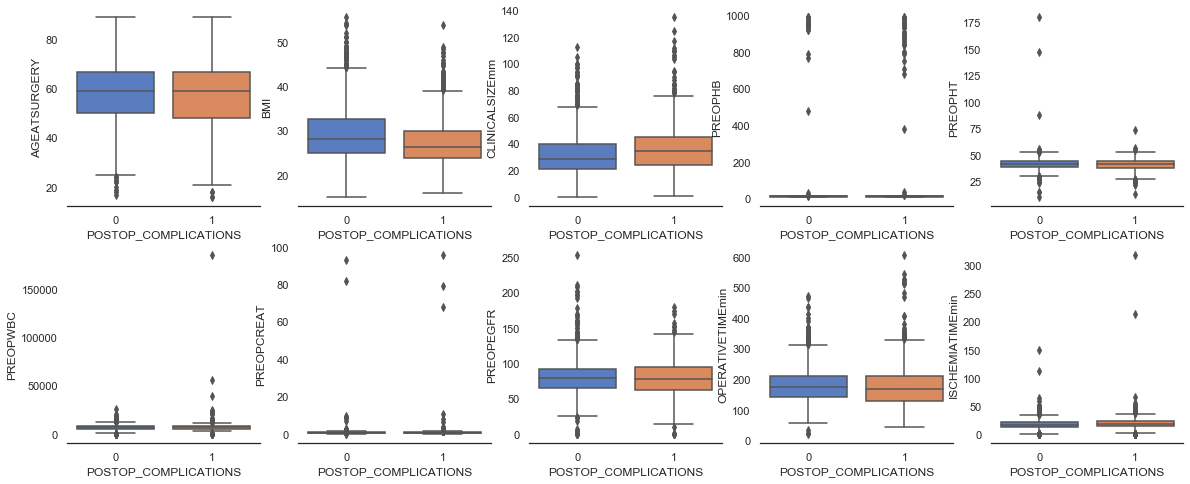

In [280]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(2, 5, figsize=(20, 8))
sns.despine(left=True)
sns.boxplot(data = df, y = 'AGEATSURGERY', x = target,ax=axes[0, 0])
sns.boxplot(data = df, y = 'BMI', x = target, ax=axes[0, 1])
sns.boxplot(data = df, y = 'CLINICALSIZEmm', x = target, ax=axes[0, 2])
sns.boxplot(data = df, y = 'PREOPHB', x = target, ax=axes[0, 3])
sns.boxplot(data = df, y = 'PREOPHT', x = target, ax=axes[0, 4])
sns.boxplot(data = df, y = 'PREOPWBC', x = target, ax=axes[1, 0])
sns.boxplot(data = df, y = 'PREOPCREAT', x = target, ax=axes[1, 1])
sns.boxplot(data = df, y = 'PREOPEGFR', x = target, ax=axes[1, 2])
sns.boxplot(data = df, y = 'OPERATIVETIMEmin', x = target, ax=axes[1, 3])
sns.boxplot(data = df, y = 'ISCHEMIATIMEmin', x = target, ax=axes[1, 4])

In [281]:
# Check the number of outliers
clean_cols = ['BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPEGFR','ISCHEMIATIMEmin']
for i in clean_cols:
    q1 = numeric_stats.loc['25%'][i]
    q3 = numeric_stats.loc['75%'][i]
    IQR = q3-q1
    LL = q1-(1.5*IQR)
    UL = q3+(1.5*IQR)
    print('{:<20s} {:>4d} {:>4d}'.format(i,len(df.loc[(df[i]>=UL)]),len(df.loc[(df[i]<=LL)])), 'UL-LL {:>4.2f}-{:>4.2f}'.format(UL,LL))

BMI                    97    0 UL-LL 42.39-13.91
CLINICALSIZEmm         79    0 UL-LL 72.00--8.00
PREOPHB                55    0 UL-LL 18.15-9.75
PREOPHT                 8   33 UL-LL 53.74-29.04
PREOPWBC               85   39 UL-LL 12845.00-1525.00
PREOPCREAT            161    2 UL-LL 1.58-0.30
PREOPEGFR              50   27 UL-LL 136.46-22.14
ISCHEMIATIMEmin        79  126 UL-LL 36.50-0.50


In [282]:
#replacing inaccurate readings with missing values
clean_cols = ['BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPEGFR']
for i in clean_cols:
    q1 = numeric_stats.loc['25%'][i]
    q3 = numeric_stats.loc['75%'][i]
    IQR = q3-q1
    LL = q1-(1.5*IQR)
    UL = q3+(1.5*IQR)
    df.drop(df.loc[(df[i]<=LL)|(df[i]>=UL),[i]].index, inplace=True)

In [283]:
df.describe()

,AGEATSURGERY,BMI,CLINICALSIZEmm,CHARLSONSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPEGFR,LOCATIONTOPOLARLINE,NOOFLESIONS,OPERATIVETIMEmin,ISCHEMIATIMEmin,BLOODLOSSml,POSTOP_COMPLICATIONS
count,2836.000000,2512.000000,2720.000000,2364.000000,2143.000000,2012.000000,1714.000000,2799.000000,2176.000000,1653.000000,2334.000000,2608.000000,2636.000000,2741.000000,2853.000000
mean,57.553949,28.101047,31.768860,1.471235,13.911834,41.554622,7205.109650,0.927681,81.079449,1.894737,1.046272,177.550230,18.704184,179.717256,0.358219
std,12.583586,5.047140,13.856054,1.965966,1.443851,4.247780,1950.604701,0.209677,18.821445,0.818847,0.245842,59.307626,10.993430,203.631204,0.479561
min,16.000000,15.100000,0.000000,0.000000,10.000000,29.800000,1840.000000,0.360000,34.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000
25%,49.000000,24.450000,22.000000,0.000000,12.900000,38.800000,5700.000000,0.780000,67.415000,1.000000,1.000000,138.000000,14.000000,50.000000,0.000000
50%,59.000000,27.280000,30.000000,1.000000,14.000000,41.900000,7000.000000,0.900000,80.000000,2.000000,1.000000,170.000000,18.000000,100.000000,0.000000
75%,67.000000,31.211950,40.000000,2.000000,15.000000,44.700000,8357.500000,1.056000,93.172500,3.000000,1.000000,210.000000,23.000000,200.000000,1.000000
max,89.000000,42.300000,71.000000,19.000000,17.800000,53.700000,12840.000000,1.570000,136.080000,3.000000,4.000000,546.000000,320.000000,2000.000000,1.000000


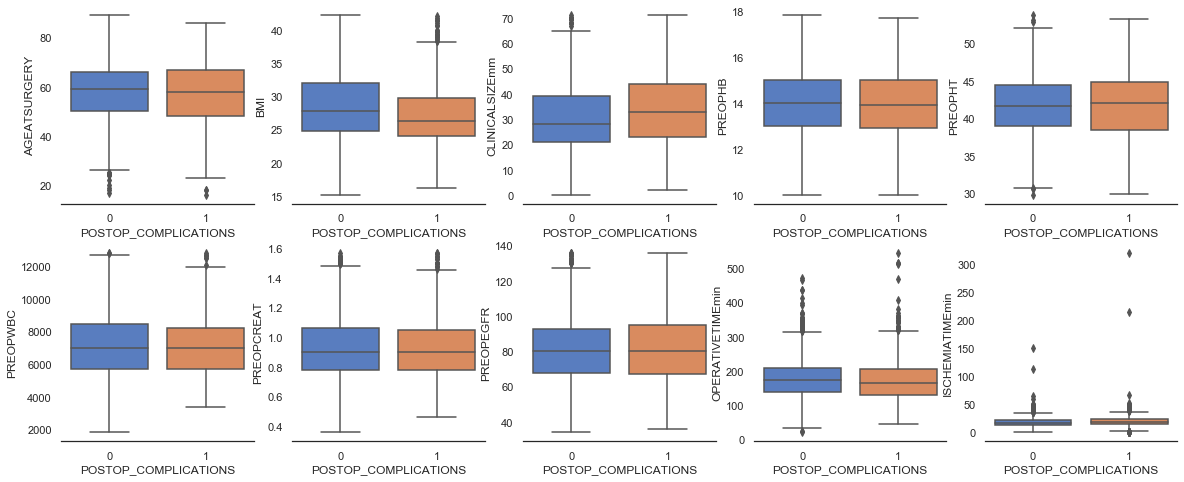

In [284]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(2, 5, figsize=(20, 8))
sns.despine(left=True)
sns.boxplot(data = df, y = 'AGEATSURGERY', x = target,ax=axes[0, 0])
sns.boxplot(data = df, y = 'BMI', x = target, ax=axes[0, 1])
sns.boxplot(data = df, y = 'CLINICALSIZEmm', x = target, ax=axes[0, 2])
sns.boxplot(data = df, y = 'PREOPHB', x = target, ax=axes[0, 3])
sns.boxplot(data = df, y = 'PREOPHT', x = target, ax=axes[0, 4])
sns.boxplot(data = df, y = 'PREOPWBC', x = target, ax=axes[1, 0])
sns.boxplot(data = df, y = 'PREOPCREAT', x = target, ax=axes[1, 1])
sns.boxplot(data = df, y = 'PREOPEGFR', x = target, ax=axes[1, 2])
sns.boxplot(data = df, y = 'OPERATIVETIMEmin', x = target, ax=axes[1, 3])
sns.boxplot(data = df, y = 'ISCHEMIATIMEmin', x = target, ax=axes[1, 4])

In [285]:
# The percentage of missing data
df.isnull().mean()

PATIENTNUMBER                    0.000000
CENTERCODE                       0.000000
GENDER                           0.003856
AGEATSURGERY                     0.005959
MARITALSTATUS                    0.367683
RACE                             0.396425
EDUCATION                        0.441640
BMI                              0.119523
CLINICALSIZEmm                   0.046618
ECOG                             0.463722
CHARLSONSCORE                    0.171399
SYMPTOMS                         0.233088
SOLITARYKIDNEY                   0.141605
BILATERALITYOFTUMOR              0.393270
SIDEOFTUMOR                      0.332282
SIDEOFSURGERY                    0.003505
FACE                             0.248160
TUMORlOCATION                    0.140554
PREOPHB                          0.248861
PREOPHT                          0.294777
PREOPWBC                         0.399229
PREOPCREAT                       0.018927
PREOPEGFR                        0.237294
PADUARISK                        0

In [286]:
# Calculate number missing values per row
df.reset_index(inplace=True, drop=True)
missing = {}

for i in range(len(df)):
    miss_cnt = 0
    for col in df.columns:
        if pd.isna(df[col][i]) == True:
            miss_cnt = miss_cnt+1
    df.loc[i,'Missing'] = miss_cnt

In [287]:
# calculate number of records with over 25% missing data
print("Total Records {}".format(len(df)))
print("Records with >=25% missing data {}".format(sum(df['Missing']<= round((len(df.columns)-2)*.30))))
print("Records to be dropped {}".format(len(df) - sum(df['Missing']<= round((len(df.columns)-2)*.30))))

Total Records 2853
Records with >=25% missing data 1831
Records to be dropped 1022


In [288]:
# Chekc thenumber of missing values for eahc variables if records with a certain missing threshold were removed
df[df['Missing']<= round((len(df.columns)-2)*.30) ].isnull().mean()

PATIENTNUMBER                0.000000
CENTERCODE                   0.000000
GENDER                       0.000546
AGEATSURGERY                 0.001092
MARITALSTATUS                0.090661
RACE                         0.098307
EDUCATION                    0.151283
BMI                          0.079192
CLINICALSIZEmm               0.029492
ECOG                         0.344074
CHARLSONSCORE                0.051884
SYMPTOMS                     0.019661
SOLITARYKIDNEY               0.001092
BILATERALITYOFTUMOR          0.067723
SIDEOFTUMOR                  0.064446
SIDEOFSURGERY                0.000546
FACE                         0.176406
TUMORlOCATION                0.028400
PREOPHB                      0.026761
PREOPHT                      0.029492
PREOPWBC                     0.107591
PREOPCREAT                   0.012015
PREOPEGFR                    0.185691
PADUARISK                    0.204806
POLARLOCATION                0.099399
RIMLOCATION                  0.200983
RENALSINUS  

In [289]:
#removing patients with more than 75% missing data
df = df[df['Missing']<= round((len(df.columns)-2)*.30) ].copy()

In [290]:
df[df.columns[df.isnull().mean() <= 0.15]].isnull().mean()

PATIENTNUMBER                0.000000
CENTERCODE                   0.000000
GENDER                       0.000546
AGEATSURGERY                 0.001092
MARITALSTATUS                0.090661
RACE                         0.098307
BMI                          0.079192
CLINICALSIZEmm               0.029492
CHARLSONSCORE                0.051884
SYMPTOMS                     0.019661
SOLITARYKIDNEY               0.001092
BILATERALITYOFTUMOR          0.067723
SIDEOFTUMOR                  0.064446
SIDEOFSURGERY                0.000546
TUMORlOCATION                0.028400
PREOPHB                      0.026761
PREOPHT                      0.029492
PREOPWBC                     0.107591
PREOPCREAT                   0.012015
POLARLOCATION                0.099399
CLINICALSIZEGROUP            0.057892
CT                           0.113053
CN                           0.113053
RADIUSmaximaldiameterincm    0.019115
ASASCORE                     0.051884
PARTIALNEPHROINDICATION      0.003277
MULTIFOCALIT

In [291]:
df = df[df.columns[df.isnull().mean() <= 0.15]]

In [292]:
# Replcaing missing values in categorical column with NA
for k in cat_col:
    if k in df.columns:
        df[k].fillna('NA',inplace = True)

In [293]:
# Replacing missing values in numerical columns with their respective mean 
for k in numeric_col_list:
    if k in df.columns:
        df[k].fillna(round(df[k].mean()), inplace = True)

In [294]:
df['OPERATIVETIMEmin'].describe()

count    1831.000000
mean      170.773894
std        54.657525
min        24.000000
25%       135.000000
50%       164.000000
75%       193.000000
max       546.000000
Name: OPERATIVETIMEmin, dtype: float64

In [295]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1831 entries, 0 to 2852
Data columns (total 51 columns):
PATIENTNUMBER                1831 non-null object
CENTERCODE                   1831 non-null object
GENDER                       1831 non-null object
AGEATSURGERY                 1831 non-null float64
MARITALSTATUS                1831 non-null object
RACE                         1831 non-null object
BMI                          1831 non-null float64
CLINICALSIZEmm               1831 non-null float64
CHARLSONSCORE                1831 non-null float64
SYMPTOMS                     1831 non-null object
SOLITARYKIDNEY               1831 non-null object
BILATERALITYOFTUMOR          1831 non-null object
SIDEOFTUMOR                  1831 non-null object
SIDEOFSURGERY                1831 non-null object
TUMORlOCATION                1831 non-null object
PREOPHB                      1831 non-null float64
PREOPHT                      1831 non-null float64
PREOPWBC                     1831 non

In [296]:
# check unique value in each column of type object
unique_count_list = {}

for k in cat_col:
    if k in df.columns:
        unique_count_list.update({k:len(df[k].unique())})

unique_count_list

{'CENTERCODE': 18,
 'GENDER': 3,
 'MARITALSTATUS': 5,
 'RACE': 5,
 'SYMPTOMS': 4,
 'SOLITARYKIDNEY': 4,
 'BILATERALITYOFTUMOR': 3,
 'SIDEOFTUMOR': 4,
 'SIDEOFSURGERY': 4,
 'TUMORlOCATION': 6,
 'POLARLOCATION': 3,
 'CLINICALSIZEGROUP': 4,
 'CT': 6,
 'CN': 4,
 'RADIUSmaximaldiameterincm': 4,
 'ASASCORE': 5,
 'PARTIALNEPHROINDICATION': 4,
 'MULTIFOCALITY': 3,
 'ACCESS': 3,
 'DAVINCIMODEL': 4,
 'ROBOTICSARMS': 3,
 'ASSISTENTTROCARS': 3,
 'DUALCONSOLE': 3,
 'ISCHEMIA': 4,
 'CLAMPARTERY': 5,
 'SELECTIVEARTERIALCLAMPING': 3,
 'CLAMPVEIN': 5,
 'EARLYUNCLAMPING': 3,
 'FLUORESCENCE': 3,
 'INNERRENORRHAPHY': 3,
 'OUTERRENORRHAPHY': 3,
 'UCSREPAIR': 3,
 'HAEMOSTATICAGENTS': 3,
 'LYMPHNODEDISSECTIONLND': 3,
 'INTRAOPTRANSUFUSION': 4,
 'INTRAOPCOMPLICATIONS': 7}

In [297]:
# convert object columns with less than 10 unique values into type category
for col in unique_count_list:
        df[col] = df[col].astype('category').copy()

In [298]:
# list of features with object type
for col in unique_count_list:
    if unique_count_list[col]>10:
        print(col,unique_count_list[col])

CENTERCODE 18


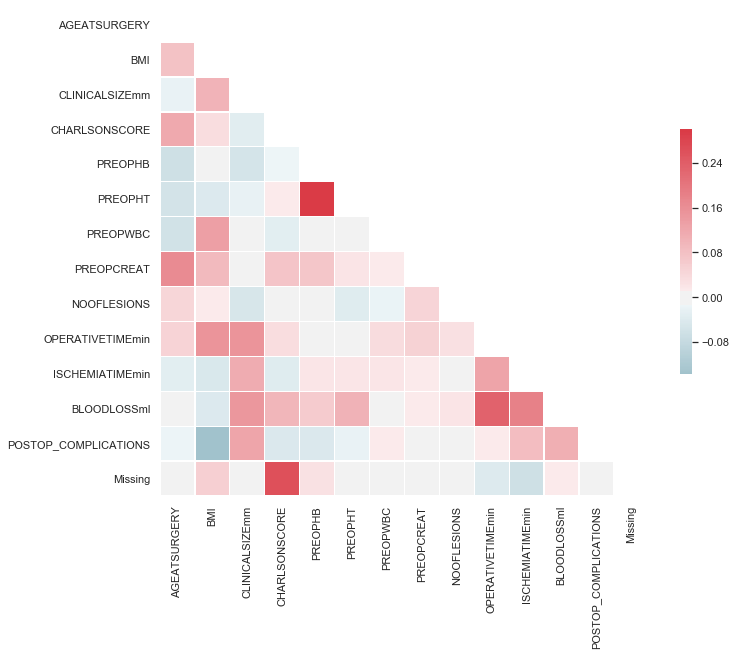

In [299]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [300]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1831 entries, 0 to 2852
Data columns (total 51 columns):
PATIENTNUMBER                1831 non-null object
CENTERCODE                   1831 non-null category
GENDER                       1831 non-null category
AGEATSURGERY                 1831 non-null float64
MARITALSTATUS                1831 non-null category
RACE                         1831 non-null category
BMI                          1831 non-null float64
CLINICALSIZEmm               1831 non-null float64
CHARLSONSCORE                1831 non-null float64
SYMPTOMS                     1831 non-null category
SOLITARYKIDNEY               1831 non-null category
BILATERALITYOFTUMOR          1831 non-null category
SIDEOFTUMOR                  1831 non-null category
SIDEOFSURGERY                1831 non-null category
TUMORlOCATION                1831 non-null category
PREOPHB                      1831 non-null float64
PREOPHT                      1831 non-null float64
PREOPWBC         

In [301]:
df.reset_index(drop=True, inplace=True)
print("Number records for predicting 30 day complications: {}".format(len(df)))

Number records for predicting 30 day complications: 1831


In [302]:
for i in df.select_dtypes('category').columns:
    df[i] = df[i].apply(str)

In [303]:
# fit label encoder to each column of type category
cat_col =df.select_dtypes('category')
df_codes = df.copy()
from sklearn.preprocessing import LabelEncoder
le_dict = {col: LabelEncoder() for col in cat_col }
for col in cat_col:
    le_dict[col].fit_transform(df_codes[col])

In [304]:
# create a dictionary cantaining mapping of categorical values to numerical values
label_mapping = dict()
label_mapping = {col: dict(zip(le_dict[col].classes_,le_dict[col].transform(le_dict[col].classes_))) for col in cat_col}
label_mapping

{'CENTERCODE': {'08ZMCILJ': 0,
  '0VZRZWAI': 1,
  '39HIP3LQ': 2,
  '3QWOG020': 3,
  '4M49I4D5': 4,
  '4UPDM0XB': 5,
  '57T3OUKU': 6,
  '63DCGHNW': 7,
  '94ISQMHX': 8,
  'FWL0MH42': 9,
  'GCIEYK6L': 10,
  'GQHLD5Q4': 11,
  'QRJWT5QR': 12,
  'RETM03Y8': 13,
  'U5WT3NOY': 14,
  'VNO3BPES': 15,
  'VRVRQ639': 16,
  'WGC7XYXZ': 17},
 'GENDER': {'Female': 0, 'Male': 1, 'NA': 2},
 'MARITALSTATUS': {'Divorced': 0,
  'Married': 1,
  'NA': 2,
  'Single': 3,
  'Widowed': 4},
 'RACE': {'Black': 0,
  'Mongoloid/Asian': 1,
  'NA': 2,
  'Others': 3,
  'White/Caucasian': 4},
 'SYMPTOMS': {'Absent': 0,
  'Local Symptoms': 1,
  'NA': 2,
  'Systemic Symptoms': 3},
 'SOLITARYKIDNEY': {'NA': 0, 'No': 1, 'Yes': 2, 'no': 3},
 'BILATERALITYOFTUMOR': {'NA': 0, 'No': 1, 'Yes': 2},
 'SIDEOFTUMOR': {'Bilateral': 0, 'Left': 1, 'NA': 2, 'Right': 3},
 'SIDEOFSURGERY': {'Bilateral': 0, 'Left': 1, 'NA': 2, 'Right': 3},
 'TUMORlOCATION': {'Lower Pol': 0,
  'Lower Pole': 1,
  'Mid Pole': 2,
  'NA': 3,
  'Upper Pol': 4,
 

In [305]:
# mapping categorical column values to integer labels
for col in cat_col:
    df_codes[col] = le_dict[col].transform(df_codes[col]).copy()

In [306]:
df_codes.head()

,PATIENTNUMBER,CENTERCODE,GENDER,AGEATSURGERY,MARITALSTATUS,RACE,BMI,CLINICALSIZEmm,CHARLSONSCORE,SYMPTOMS,SOLITARYKIDNEY,BILATERALITYOFTUMOR,SIDEOFTUMOR,SIDEOFSURGERY,TUMORlOCATION,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,POLARLOCATION,CLINICALSIZEGROUP,CT,CN,RADIUSmaximaldiameterincm,ASASCORE,PARTIALNEPHROINDICATION,MULTIFOCALITY,NOOFLESIONS,ACCESS,DAVINCIMODEL,ROBOTICSARMS,ASSISTENTTROCARS,DUALCONSOLE,OPERATIVETIMEmin,ISCHEMIA,CLAMPARTERY,SELECTIVEARTERIALCLAMPING,CLAMPVEIN,EARLYUNCLAMPING,FLUORESCENCE,INNERRENORRHAPHY,OUTERRENORRHAPHY,ISCHEMIATIMEmin,UCSREPAIR,HAEMOSTATICAGENTS,LYMPHNODEDISSECTIONLND,BLOODLOSSml,INTRAOPTRANSUFUSION,INTRAOPCOMPLICATIONS,POSTOP_COMPLICATIONS,Missing
0,13PAT000522,0,1,61.0,1,1,25.10,33.0,0.0,0,2,1,1,1,0,12.3,39.4,5400.0,1.25,2,1,1,1,1,2,1,1,1.0,2,3,1,2,1,180.0,3,0,2,2,1,2,2,2,25.0,2,2,2,100.0,3,6,1,0.0
1,22PAT000131,17,1,58.0,1,1,23.18,44.0,0.0,0,1,1,1,1,2,14.0,41.0,5100.0,0.90,1,0,2,1,0,0,1,1,1.0,2,3,0,0,1,170.0,3,0,1,2,1,1,2,2,21.0,1,1,1,300.0,3,6,1,1.0
2,11PAT000166,1,1,56.0,1,1,23.36,32.0,0.0,0,1,1,1,1,0,10.2,36.4,5200.0,0.70,2,1,1,1,1,0,1,1,1.0,2,3,1,2,1,160.0,3,0,1,2,1,1,1,1,20.0,1,1,1,75.0,3,6,1,2.0
3,15PAT000097,15,0,65.0,1,4,26.67,32.0,0.0,0,1,1,1,1,4,11.8,36.0,5300.0,1.12,2,1,1,1,1,1,1,1,1.0,2,2,0,0,1,212.0,3,0,1,2,1,1,2,2,13.0,1,1,1,50.0,3,6,1,3.0
4,15PAT000095,15,0,23.0,3,4,19.65,23.0,0.0,0,1,1,3,3,3,13.3,39.2,12100.0,0.70,1,1,1,1,1,0,1,1,1.0,2,3,0,0,1,174.0,3,0,1,2,1,1,2,2,11.0,1,1,1,20.0,3,6,1,2.0


### Create Stats for dataset

In [307]:
# print median , IQR for numeric columns 
for i in df.columns:#['AGEATSURGERY','BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPEGFR','NOOFLESIONS']:
    if i in numeric_col_list:
        print(i, "{0:.1f} [{1:.1f}-{2:.1f}]".format(np.median(df[i]),np.percentile(df[i],25),np.percentile(df[i],75)))

AGEATSURGERY 58.0 [48.0-66.0]
BMI 27.4 [24.4-30.1]
CLINICALSIZEmm 30.0 [22.0-40.0]
CHARLSONSCORE 1.0 [0.0-2.0]
PREOPHB 14.0 [13.1-15.0]
PREOPHT 42.0 [39.2-44.8]
PREOPWBC 7111.0 [5805.0-8100.0]
PREOPCREAT 0.9 [0.8-1.1]
NOOFLESIONS 1.0 [1.0-1.0]
OPERATIVETIMEmin 164.0 [135.0-193.0]
ISCHEMIATIMEmin 18.0 [14.0-22.0]
BLOODLOSSml 100.0 [50.0-200.0]


In [308]:
for i in df_codes.columns:
    if i in cat_col:
        print(df_codes[i].apply(lambda x: le_dict[i].inverse_transform([x])[0]).value_counts(), "\n")

GCIEYK6L    447
4UPDM0XB    283
63DCGHNW    230
4M49I4D5    150
VNO3BPES    129
08ZMCILJ    109
U5WT3NOY     79
0VZRZWAI     74
FWL0MH42     71
QRJWT5QR     57
WGC7XYXZ     43
57T3OUKU     35
GQHLD5Q4     33
RETM03Y8     30
3QWOG020     25
VRVRQ639     17
39HIP3LQ     13
94ISQMHX      6
Name: CENTERCODE, dtype: int64 

Male      1187
Female     643
NA           1
Name: GENDER, dtype: int64 

Married     1379
Single       176
NA           166
Widowed       55
Divorced      55
Name: MARITALSTATUS, dtype: int64 

White/Caucasian    965
Others             365
Mongoloid/Asian    264
NA                 180
Black               57
Name: RACE, dtype: int64 

Absent               1426
Local Symptoms        336
NA                     36
Systemic Symptoms      33
Name: SYMPTOMS, dtype: int64 

No     1287
no      496
Yes      46
NA        2
Name: SOLITARYKIDNEY, dtype: int64 

No     1627
NA      124
Yes      80
Name: BILATERALITYOFTUMOR, dtype: int64 

Right        852
Left         800
NA        

In [309]:
traget_stats = pd.merge(df_codes[['PATIENTNUMBER']],
                        df_ori[['PATIENTNUMBER','SURGICALCOMPLICATIONS','NONSURGICALCOMPLICATIONS','CLAVIENGRADE','LENGTHOFSTAYdays']], 
                        left_on='PATIENTNUMBER', 
                        right_on='PATIENTNUMBER').copy()

In [246]:
df_codes.drop(labels=['Missing'], axis='columns', inplace=True)

In [178]:
df_codes.corr()[target]

CENTERCODE                  -0.081694
GENDER                       0.001897
AGEATSURGERY                -0.015110
MARITALSTATUS               -0.033129
RACE                        -0.211098
BMI                         -0.136682
CLINICALSIZEmm               0.125672
CHARLSONSCORE               -0.042597
SYMPTOMS                    -0.089034
SOLITARYKIDNEY              -0.026629
BILATERALITYOFTUMOR         -0.134335
SIDEOFTUMOR                  0.038658
SIDEOFSURGERY                0.021490
TUMORlOCATION               -0.020506
PREOPHB                     -0.044275
PREOPHT                     -0.020004
PREOPWBC                     0.012801
PREOPCREAT                  -0.007068
POLARLOCATION                0.096288
CLINICALSIZEGROUP           -0.026671
CT                           0.148667
CN                          -0.425927
RADIUSmaximaldiameterincm   -0.019652
ASASCORE                    -0.165670
PARTIALNEPHROINDICATION     -0.154874
MULTIFOCALITY               -0.127385
NOOFLESIONS 

In [179]:
print('Number of patients {}'.format(len(df_codes)))
print('% of patients with complications {:.2f}%'.format(sum(df_codes[target])/len(df_codes)*100))

Number of patients 1831
% of patients with complications 40.47%


In [180]:
output_path = 'H:\RediMinds\VCQI'
df_codes.to_csv(output_path+"\VCQI_clean_30_day_complications.csv",index=False)

In [181]:
# Split data in test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_codes, test_size=0.30, random_state=42, stratify = df_codes[target])

In [182]:
# Percentage of complications in trainset
train[target].sum()/len(train)

0.40437158469945356

In [183]:
# Percentage of complications in testset
test[target].sum()/len(test)

0.40545454545454546

In [184]:
# Save train and test dataset
train.to_csv(output_path+"\VCQI_clean_train_30_day_complications.csv",index=False)
test.to_csv(output_path+"\VCQI_clean_test_30_day_complications.csv",index=False)

In [185]:
import pickle

cat_col = df.select_dtypes('category')

with open(output_path+'\cat_col_30_day_complications', 'wb') as fp:
    pickle.dump(cat_col.columns.to_list(), fp)

In [187]:
len(df)

1831